# 3. Poisson Regression

Exponential family: $p(y;\eta) = b(y)\exp(\eta^TT(y)-a(\eta))$.

## (a)

$$\begin{align*} 
p(y;\lambda) &= \frac{e^{-\lambda}\lambda^y}{y!}\\
&= \frac 1{y!} \exp(-\lambda + y\log \lambda)\\
&= \frac 1{y!} \exp((\log \lambda)^T y - \exp(\log \lambda))
\end{align*}$$

So we can take 
$$\begin{align*}
b(y)&=\frac 1{y!}\\
\eta &= \log \lambda\\
T(y) &= y\\
a(\eta) &= \exp(\eta)
\end{align*}$$

## (b)

The canonical response function is 
$$ g(\eta) = E[T(y);\eta] = E[y;\eta] = \lambda = \exp \eta.$$

## (c)

We have 
$$ \log p(y^{(i)} \mid x^{(i)}; \theta) = \log b(y^{(i)}) + (x^{(i)})^T\theta y^{(i)}- a((x^{(i)})^T\theta)$$

Taking the differential with respect to $\theta$ gives

$$ \mathrm d_\theta\log p(y^{(i)} \mid x^{(i)}; \theta) = y^{(i)}(x^{(i)})^T - \exp((x^{(i)})^T\theta)(x^{(i)})^T $$

So the gradient is given by $x^{(i)}(y^{(i)}-g(\theta^Tx^{(i)})) =x^{(i)}(y^{(i)}-h_\theta(x^{(i)})) $, which gives the update rule

$$ \theta \mapsto  \theta + \alpha x^{(i)}(y^{(i)}-h_\theta(x^{(i)}))$$

for stochastic gradient, where $\alpha$ is the learning rate.

Looking at a single coordinate $j$ this means that $\theta_j$ updates as
$$ \theta_j \mapsto \theta_j + \alpha x^{(i)}_j (y^{(i)}- h_\theta(x^{(i)}))$$

## (d)

In [1]:
import numpy as np
import src.util as util

from src.linear_model import LinearModel

Load the data:

In [2]:
train_path='data/ds4_train.csv'
eval_path='data/ds4_valid.csv'

x_train, y_train = util.load_dataset(train_path, add_intercept=False)
x_val, y_val = util.load_dataset(eval_path, add_intercept=False)

Take a look at the data:

In [3]:
x_train, x_train.shape

(array([[1.        , 0.        , 0.99204749, 0.32574102],
        [0.        , 1.        , 0.47046345, 0.37186578],
        [0.        , 1.        , 0.49653283, 0.28985262],
        ...,
        [0.        , 1.        , 0.5731734 , 0.42840612],
        [0.        , 1.        , 0.60116637, 0.94911474],
        [0.        , 1.        , 0.32460144, 0.40509498]]),
 (2500, 4))

In [4]:
y_train, y_train.shape

(array([ 2463097.,   645481.,   474123., ...,  1016002., 10620315.,
          558245.]),
 (2500,))

Define a Poissonregression model:

In [5]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***        
        m,n = x.shape
        
        def gradient(theta):
            return 1/m * x.T @ (y-np.exp(x@theta))
        
        theta = np.zeros(n)
        lr = self.step_size
        step = lr * gradient(theta)
        
        while np.linalg.norm(step,1) > self.eps:
            theta += step
            step = lr * gradient(theta)
            
        self.theta = theta + step

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return np.exp(x@ self.theta)
        # *** END CODE HERE ***

Fit a model to the training data:

In [6]:
clf = PoissonRegression(1e-7)
clf.fit(x_train, y_train)
clf.theta

array([11.2993503 , 10.7993319 ,  2.00025994,  4.40057538])

Let's plot the predictions on the validation set. The red dots correspond to $(i,y^{(i)})$, and the blue crosses to the predictions.

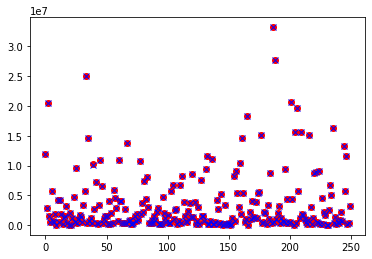

In [7]:
import matplotlib.pyplot as plt
y_pred = clf.predict(x_val)
plt.plot(y_pred, 'ro')
plt.plot(y_val, 'bx')